# Reprojection
In this short notebook, we go through using the package [*reproject*](https://reproject.readthedocs.io/en/stable/) to resample the VIS band Euclid data of the Perseus cluster to the same resolution of the NISP bands. This is essential for doing further data analysis in which we will detect and extract sources from the Perseus data and this requires the filters to have the same WCS.

We will start by importing the standard packages.

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd

Now we will get the Euclid ERO data. Please use your own path to your working directory.

In [2]:
# data directory
data_dir = "/Users/ruby/Documents/Python Scripts/Euclid/ERO/" # YOUR PATH HERE
# list of fits files
fits_files = ['Euclid-NISP-Y-ERO-Perseus-LSB.v2.fits',
              'Euclid-NISP-H-ERO-Perseus-LSB.v2.fits',
              'Euclid-NISP-J-ERO-Perseus-LSB.v2.fits',
              'Euclid-VIS-ERO-Perseus-LSB.v6.fits']

nbands = len(fits_files)
filters = ['NISP-Y', 'NISP-H', 'NISP-J', 'VIS']

Let's check the headers.

In [3]:
# open and check the fits files
hdu = fits.open(data_dir+'Euclid-NISP-Y-ERO-Perseus-LSB.v2.fits')
hdu.info()
hdu.close()
hdu = fits.open(data_dir+'Euclid-NISP-H-ERO-Perseus-LSB.v2.fits')
hdu.info()
hdu.close()
hdu = fits.open(data_dir+'Euclid-NISP-J-ERO-Perseus-LSB.v2.fits')
hdu.info()
hdu.close() 
hdu = fits.open(data_dir+'Euclid-VIS-ERO-Perseus-LSB.v6.fits')
hdu.info()
hdu.close()


Filename: /Users/ruby/Documents/Python Scripts/Euclid/ERO/Euclid-NISP-Y-ERO-Perseus-LSB.v2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     215   (14000, 14000)   float32   
Filename: /Users/ruby/Documents/Python Scripts/Euclid/ERO/Euclid-NISP-H-ERO-Perseus-LSB.v2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     215   (14000, 14000)   float32   
Filename: /Users/ruby/Documents/Python Scripts/Euclid/ERO/Euclid-NISP-J-ERO-Perseus-LSB.v2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     215   (14000, 14000)   float32   
Filename: /Users/ruby/Documents/Python Scripts/Euclid/ERO/Euclid-VIS-ERO-Perseus-LSB.v6.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     215   (42000, 42000)   float32   


Okay, so we see that VIS is much larger is size than the NISP bands.
We choose to reproject VIS to the same WCS as NISP-H. 

In [4]:
# we will reproject the VIS to the same header as NISP H
hdu1 = fits.open(data_dir+'Euclid-NISP-H-ERO-Perseus-LSB.v2.fits')[0]
hdu2 = fits.open(data_dir+'Euclid-VIS-ERO-Perseus-LSB.v6.fits')[0]

Text(0.5, 1.0, 'VIS')

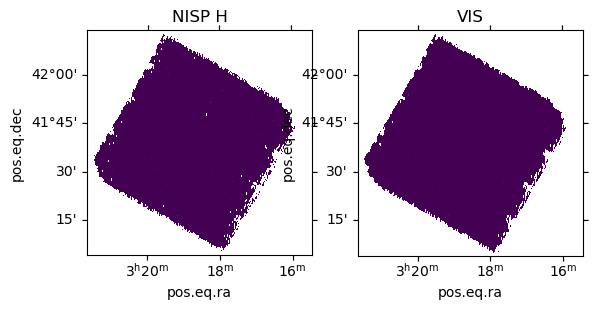

In [5]:
# now examine the two images
from astropy.wcs import WCS

ax1 = plt.subplot(1, 2, 1, projection=WCS(hdu1.header))
ax1.imshow(hdu1.data, origin='lower')
ax1.set_title('NISP H')

ax2 = plt.subplot(1, 2, 2, projection=WCS(hdu2.header))
ax2.imshow(hdu2.data, origin='lower')
ax2.set_title('VIS')

We now reproject the VIS image onto the same header as NISP-H.
To do this, you will need to install Astropy's [reproject](https://reproject.readthedocs.io/en/stable/). Information on how to install this package is given on this page along with a detailed tutorial of how to use the package.

In [6]:
from reproject import reproject_interp

array, footprint = reproject_interp(hdu2, hdu1.header)

We write this to *dtype=float32*.

In [7]:
array = array.astype('float32')

The function above returns the reprojected array as well as an array that provides information on the footprint of the first image in the new reprojected image plane. Let's visualise this.

Text(0.5, 1.0, 'VIS image footprint')

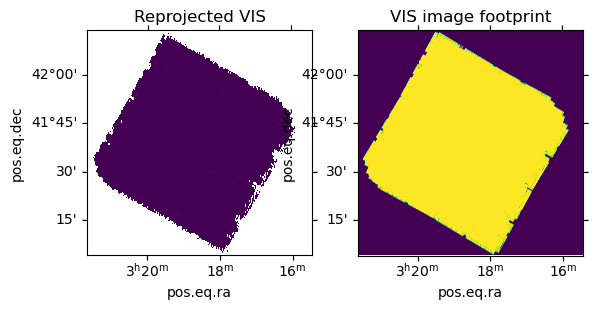

In [8]:
ax1 = plt.subplot(1, 2, 1, projection=WCS(hdu1.header))
ax1.imshow(array, origin='lower')
ax1.set_title('Reprojected VIS')

ax2 = plt.subplot(1, 2, 2, projection=WCS(hdu1.header))
ax2.imshow(footprint, origin='lower')
ax2.set_title('VIS image footprint')

We can now write this to a *.fits* file to use in our source detection and extraction python notebook.

In [9]:
fits.writeto('reproject-2-Euclid-VIS-ERO-Perseus-LSB.v6.fits', array, hdu1.header, overwrite=True)

Let's quickly inspect this reprojected fits file.

Filename: /Users/ruby/Documents/Python Scripts/Euclid/ERO/reproject-Euclid-VIS-ERO-Perseus-LSB.v6.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     214   (14000, 14000)   float32   


Text(0.5, 1.0, 'Reprojected VIS')

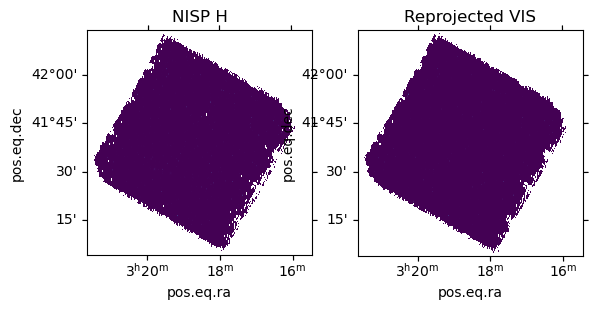

In [10]:
hdu_repro = fits.open(data_dir+'reproject-Euclid-VIS-ERO-Perseus-LSB.v6.fits')
hdu_repro.info()

ax1 = plt.subplot(1, 2, 1, projection=WCS(hdu1.header))
ax1.imshow(hdu1.data, origin='lower')
ax1.set_title('NISP H')

ax2 = plt.subplot(1, 2, 2, projection=WCS(hdu_repro[0].header))
ax2.imshow(hdu_repro[0].data, origin='lower')
ax2.set_title('Reprojected VIS')

Great! Now we can start doing some source detection and extraction.